### Degree Centrality
Degree of a node is number of edges connected to it. Degree is sometimes called degree centrality. For example is social networks, individuals who have connections to many others might have more ifluence, more access to information or more prestigiuos. A non social network example is the use of citation counts in the evaluation of scintific papers. The number of citations a paper recieves from other papers, gives a crude measure of whether the paper has been influential or not and is widely used as a metric for judging the impact if scientific research.

### Eigenvector Centrality
In many circumstances a vertex;s importnace in a network is increased by having connections to other vertices that are themselves important. This is concept behind eigenvector centrality. Instread f awarding vertices just one point for each neighbour, eigenvector centrality gives vertex a score proportional to the sum of scores of its neighbours. 

1. Lets make some initial guess about the centrality of each vertex i. e.g $x_i=1$
2. We can use it to calculate a better one $x_i'$, which is defined to be some of centralities of i's neighbours.
$$ x_i' = \sum_j A_{ij}x_j$$ 
where $A_{ij}$ is adjacency matrix. We can write this expression in matrix notation as $x' = Ax$, where x is the vector of centralaties with elements $x_i$.
3. Repeat this process to make better estimate, we have after t steps a vector of centralaties $x(t)$ given by
$$ x(t) = A'x(0)$$

We can write $x(0)$ as a linear combination of the eigenvectors $v_i$ of the adjacency matrix thus:
$$ x(0) = \sum_i c_i v_i $$ 
for some appropriate constants $c_i$. Then,
$$ x(t) = A^t \sum_i c_i v_i = \sum_i c_i \kappa_i' v_i = \kappa_1' \sum_i c_i ({\frac {\kappa_i}{\kappa_1}})^t v_i$$
where $\kappa_i$ are the eignevalues of $A$ and $\kappa_1$ is the largest of them. Since $\kappa_i/\kappa_1 < 1 $ for all $ i \ne 1$, all terms in the sum other that the first decay exponentially as t becomes large. Equivalently we can say that centralatity satisfies 
$$ Ax = \kappa_1 x$$ 
or equivalently
$$ x = \kappa_1^{-1} Ax $$
hence centrality of vertex i is given by $x_i$ is proprtional to sum of the centralities of i's neghbours:
$$ x_i = \kappa_1^{-1} \sum_j A_{ij} x_j $$

This gives eigenvector centrality nice property that it can be large either because a vertex has many neighbours or because it has important neighbors(or both). Also eignevector centrality of all vertices are non-negative. In theory eignevector centrality can be calculated for either undirected or dirceted networks. It works best however for undirected case. In case of dirceted networks, there are two sets of eigenvectors because of non symmetric nature of it. This raises question of which eignevector to use. In most cases the correct answer is to use the right eignevector. The reason  is that centrality in directed networks is usually bstowed by other vertices pointing towards you, rather than by you. 

In case of directed networks, only vertices that are in a strongly conected component of two or more vertices, or the out-component of such a component, can have non-zrro eigenvector centrality.

### Kartz Centrality
In many cases it is appropriate for vertices with high in degree to have high centrality even if they are not in a strongly connected cmponent or its out-component. Problem with eigenvector centrality that it assignes such vertices as 0 centrality. Kartz Centrality solves this problem by assigning each vertex small amount of centrality for free, regradless of its position in the network. In other words we define
$$ x_i = \alpha \sum_j A_{ij} + \beta $$, 
where $\alpha$ and $\beta$ are positive constants. By adding $\beta$ even vertices with zero in-degree still gets centrality $\beta$. Once they have a non-zero centrality, then the vertices they point to derive some advantage from being pointed to. 
$$ x = \beta{(I - \alpha A)}^{-1} $$ for convenience we usually set $\beta = 1$, givning
$$ x = {(I - \alpha A)}^{-1} $$

How to choose $\alpha$? If we let it reach 0, then only the constant term survives and all vertices have same centrality $\beta$. As we increase $\alpha$ from zero the centralaties increase and eventually there comes a point at which they diverge. This happens at $\alpha = \kappa_1^{-1}$ the largest eignevalue of A. Thus we should choose value less than this if we wish the expression for the centralaties to converge. Most researches have employed values close to the maximum of $\kappa_1^{-1}$, which palces maximum amount of weightage on the eigenvector term abd smalles amount on the constant term. 

In [17]:
# lets create a sample graph in networkx
import networkx as nx
import matplotlib.pyplot as plt

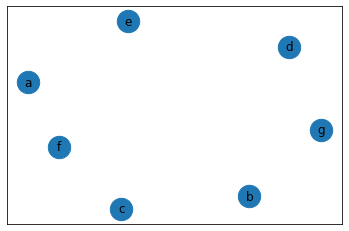

In [18]:
G=nx.Graph() # empty graph 

# add nodes to graph, we will be adding n (7) nodes 
G.add_node("a")
G.add_node("b")
G.add_node("c")
G.add_node("d")
G.add_node("e")
G.add_node("f")
G.add_node("g")

# lets plot the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(G, pos)
plt.show()
#nx.draw_networkx_labels(G)

We have graph with seven nodes without any edges, ekts add some edges

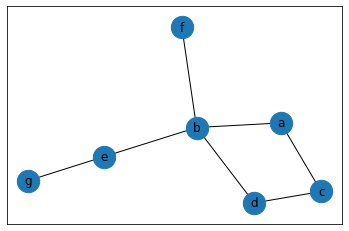

In [22]:
G.add_edges_from([("a","c"),("c","d"), ("b","d"), ("g","e"), ("b", "e"), ("f", "b")])
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
plt.show()

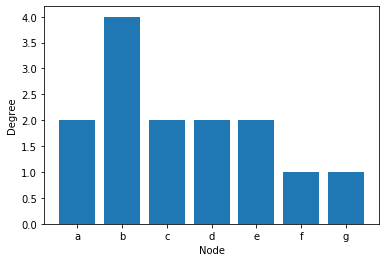

In [30]:
# Now lets find out degree centrality of each nodes
degree = G.degree()
dict_degree = dict(degree)
plt.bar(range(len(dict_degree)), list(dict_degree.values()), align='center')
plt.xticks(range(len(dict_degree)), list(dict_degree.keys()))
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

Above shows node 'b' has highest degree, which is visible from the diagram as well.
Lets look into the Eigenvector Centrality of the nodes

In [27]:
eignenv_centrality = nx.eigenvector_centrality(G)

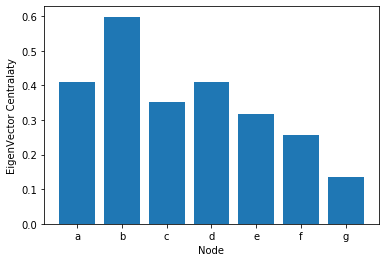

In [31]:
plt.bar(range(len(eignenv_centrality)), list(eignenv_centrality.values()), align='center')
plt.xticks(range(len(eignenv_centrality)), list(eignenv_centrality.keys()))
plt.xlabel('Node')
plt.ylabel('EigenVector Centralaty')
plt.show()

It is visible from above plot that even though degree of the nodes 'f' and 'g' are same, f has a connection to 'b'(which itself has many connections), eigenvector centrality for 'f' is larger than 'g'.

Lets make same graph connected and compute eignevector centrality using right eigenvector

In [38]:
G=nx.DiGraph() # empty graph 

# add nodes to graph, we will be adding n (7) nodes 
G.add_node("a")
G.add_node("b")
G.add_node("c")
G.add_node("d")
G.add_node("e")
G.add_node("f")
G.add_node("g")

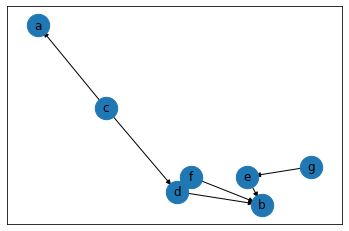

In [39]:
G.add_edges_from([("c","a"),("c","d"), ("d","b"), ("g","e"), ("e", "b"), ("f", "b")])
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
plt.show()

In [41]:
eignenv_centrality = nx.eigenvector_centrality(G, max_iter=1000)

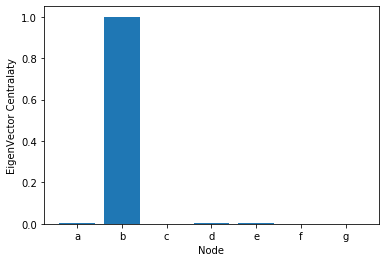

In [42]:
plt.bar(range(len(eignenv_centrality)), list(eignenv_centrality.values()), align='center')
plt.xticks(range(len(eignenv_centrality)), list(eignenv_centrality.keys()))
plt.xlabel('Node')
plt.ylabel('EigenVector Centralaty')
plt.show()

In [43]:
import math
phi = (1+math.sqrt(5))/2.0 # largest eigenvalue of adj matrix
centrality = nx.katz_centrality(G,1/phi-0.01)

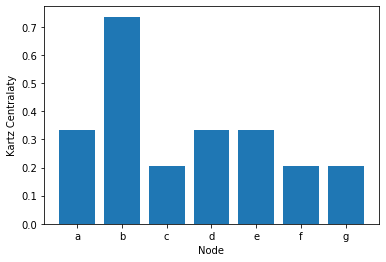

In [44]:
plt.bar(range(len(centrality)), list(centrality.values()), align='center')
plt.xticks(range(len(centrality)), list(centrality.keys()))
plt.xlabel('Node')
plt.ylabel('Kartz Centralaty')
plt.show()

If we compare both, we can see in case of Kartz centrality, nodes 'd' and 'e' which has neglible eigenvector centrality, has now some values. This is because they have outgoing edges to node 'b' and some incoming edges as well. The nodes 'f', 'g', 'c' had 0 eigenvector centrality, however these also got some values in Kartz centrality.

### Pagerank
The problem with Kartz centrality is that, a high centrality node pointing to million others gives all one million of them high centrality. This is not always appropriate. 
We could solve this problem by defining a variation of Kartz centrality in which the centrality a node derive from its network neighbours is proprtional to their centrality devided by the out-degree. Then vertices that point to many others pass only a small amount of centrality on to each of those others, even if their own centrality is high. 

We can formulate this as:
$$ x_i = \alpha \sum A_{ij} \frac{x_i}{k_j^{out}} = \beta $$
However the problem is when the network has nodes with out-degree as zero. However we can fix it with artificially putting $k_i^{out} = 1$ for all such nodes. In matrix terms, 
$$ x = \alpha AD^{-1}x  + \beta 1 $$, 
again setting $\beta = 1$ gives
$$ x = (I - \alpha AD^{-1})^{-1} 1 = D(D-\alpha A)^{-1}1 $$

This centrality is known as *PageRank*